## Clean and Analyze Employee Exit Surveys
**Data**: Exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) body of the Queensland government in Australia. The TAFE exit survey can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

**Objective is combine the results for both surveys to answer the following questions:**

1) Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2) Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Read files for initial exploration 

In [286]:
#read data
import pandas as pd
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated', engine ='python') 
tafe_survey = pd.read_csv('tafe_survey.csv', engine ='python')

In [287]:
dete_survey.head()
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [288]:
tafe_survey.head()
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

---------------------------------------------------------------------------------------------------
### Cleaning for DETE survey
* Not Stated value need to change to NaN
* Delete unnecessary columns, such as columns unrelated to employee satisfcation, length of employment and age. 
* Clean column names 

### Cleaning for TAFE survey
* Delete unnecessary columns, such as columns unrelated to employee satisfcation, length of employment and age. 
* Clean column names and to match with DETE file. As ultimately we need to merge the 2 surveys.

In [289]:
# Remove unnecessary columns for our analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [290]:
#rename columns for DETE
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [291]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').\
                            str.lower().str.replace('/','_')

In [292]:
#checking column names were updated correctly. 
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [293]:
#rename columns for TAFE
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],


In [294]:
dete_survey_updated['classification'].unique()

array(['A01-A04', 'AO5-AO7', nan, 'Primary', 'Secondary',
       'Special Education', 'PO1-PO4', 'AO8 and Above', 'Middle'],
      dtype=object)

In [295]:
# tafe_survey_updated.iloc[:,-3].unique()
tafe_survey_updated['Classification. Classification'].unique()

array(['Administration (AO)', nan, 'Teacher (including LVT)', 'Tutor',
       'Technical Officer (TO)', 'Professional Officer (PO)',
       'Operational (OO)', 'Executive (SES/SO)',
       'Workplace Training Officer', 'Apprentice'], dtype=object)

In [296]:
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace('\s+',' ')

In [297]:
tafe_survey_updated = tafe_survey_updated.rename({'Record ID':'id','Reason for ceasing employment':'separationtype',\
                           'Gender. What is your Gender?':'gender','CurrentAge. Current Age':'age',\
                          'Employment Type. Employment Type':'employment_type',\
                           'Classification. Classification':'position',\
                           'LengthofServiceOverall. Overall Length of Service at Institute (in years)':\
                           'institute_service',\
                           'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service',\
                            'CESSATION YEAR':'cease_date'},\
                          axis=1)


In [298]:
tafe_survey_updated.columns =tafe_survey_updated.columns.str.lower()

In [299]:
tafe_survey_updated.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing factors. career move - public sector ',
       'contributing factors. career move - private sector ',
       'contributing factors. career move - self-employment',
       'contributing factors. ill health',
       'contributing factors. maternity/family',
       'contributing factors. dissatisfaction',
       'contributing factors. job dissatisfaction',
       'contributing factors. interpersonal conflict',
       'contributing factors. study', 'contributing factors. travel',
       'contributing factors. other', 'contributing factors. none', 'gender',
       'age', 'employment_type', 'position', 'institute_service',
       'role_service'],
      dtype='object')

----------------------------------------------------------------------------------------------
### Filter data to include records for resignation only
* Update fields with 'resignation' to 'Resignation' only
* Filter table to exclude all other separation type. 

In [300]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [301]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [302]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

In [303]:
#filter table to include resignation only
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation']
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation']

--------------------------------------------------------------------------------------------------
### Clean and explore Cease date and Start date. 
* Ensure cease date is before the current date.
* Transform to year only
* Create new column for DETE dataframe, containing lenghth of time an employee worked in the role. This is represented by 'institute_service' in TAFE dataframe. 

In [304]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2006      1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [305]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]

C:\Users\Liao\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [306]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [307]:
tafe_resignations['cease_date'].value_counts()


2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [308]:
dete_resignations['cease_date'].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [309]:
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].astype('str').str.extract(r'(\d+)')

C:\Users\Liao\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [310]:
tafe_resignations['institute_service'].value_counts()

1     73
01    64
03    63
20    36
05    33
07    21
Name: institute_service, dtype: int64

In [311]:
dete_resignations['cease_date']=dete_resignations['cease_date'].astype('float')

C:\Users\Liao\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [312]:
#create institute_service column for DETE dataframe, by (cease_date - start_date)
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

C:\Users\Liao\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [313]:
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

---------------------------------------------------------------------------------------------------
### Identify which column indicated employee dissatisfaction

**DETE dataframe**
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload
<br>If the employee answered True is any of the above column, 'dissatisfaction' column is to be marked as 'True'.

**TAFE dataframe**
* contributing factors. dissatisfaction
* contributing factors. job dissatisfaction

**Create a new column 'dissatisfaction'**
If the employee made selection in any of the above columns, a 'True' value will be assigned to the 'dissatisfaction' column. Otherwise a 'False' value will be assigned. NaN value will kept as missing value. 

In [314]:
dete_resignations['job_dissatisfaction'].value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [315]:
#create new column 'dissatisfaction'
dete_resignations['dissatisfaction'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis= 1, skipna=False)
dete_resignations['dissatisfaction'].value_counts()

C:\Users\Liao\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    162
True     149
Name: dissatisfaction, dtype: int64

In [316]:
tafe_resignations['contributing factors. job dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: contributing factors. job dissatisfaction, dtype: int64

In [317]:
tafe_resignations['contributing factors. dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: contributing factors. dissatisfaction, dtype: int64

In [318]:
tafe_resignations['contributing factors. job dissatisfaction']

3      -
4      -
5      -
6      -
7      -
      ..
696    -
697    -
698    -
699    -
701    -
Name: contributing factors. job dissatisfaction, Length: 340, dtype: object

In [319]:
import numpy as np
def update(x):
    if x =='-':
        return False
    elif pd.isnull(x):
        return np.nan
    else: 
        return True 

In [320]:
tafe_resignations['dissatisfaction']= tafe_resignations[['contributing factors. dissatisfaction','contributing factors. job dissatisfaction']].\
applymap(update).any(axis=1, skipna=False)

C:\Users\Liao\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [321]:
tafe_resignations['dissatisfaction'].value_counts(dropna=False)

False    241
True      91
True       8
Name: dissatisfaction, dtype: int64

In [322]:
tafe_resignations['dissatisfaction'].isnull().value_counts()

False    332
True       8
Name: dissatisfaction, dtype: int64

----------------------------------------------------------------------------------------------------
### Combine DETE and TAFE dataframes
* Add additional column to differentiate the two datasets once combined.


In [323]:
tafe_resignations['institute']='tafe'
dete_resignations['institute']='dete'

C:\Users\Liao\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Liao\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [324]:
combined = pd.concat([tafe_resignations,dete_resignations], ignore_index=True)
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
employment_type                                        290
employment_status                                      307
interpersonal_conflicts                                311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    311
physical_work_environment                              3

#### We only require columns from 'institue_service' to 'id' for analysis
filter out the other columns

In [325]:
combined_updated = combined.dropna(thresh = 500, axis =1)

### Categorize employee's length of employment (institute_service) into four stages

New column for 'career stage' will follow the definitions below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

Definition is based on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage). 


In [326]:
#function to transform year of employment into stage of employment
def transform_service(x):
    if x >= 11:
        return 'Veteran'
    elif 7<= x <=10:
        return 'Established'
    elif 3<= x <= 6:
        return 'Experienced'
    elif pd.isnull(x):
        return np.nan
    else:
        return 'New'

In [327]:
combined_updated['service_cat'] = combined_updated['institute_service'].astype('float').apply(transform_service)
combined_updated['service_cat'].value_counts()

C:\Users\Liao\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

---------------------------------------------------------------------------------------------------
### Visualize the results
* Convert NaN values to the most frequent value, for visualizating purpose. 

In [328]:
combined_updated['dissatisfaction'] = combined_updated['dissatisfaction'].fillna(False)

C:\Users\Liao\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Proportion of Employees')

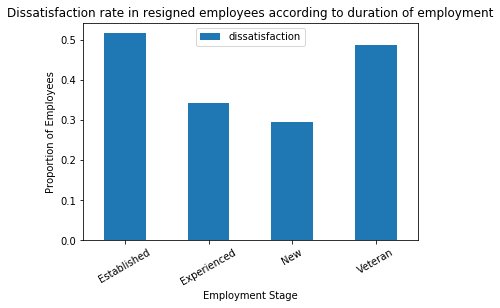

In [329]:
import matplotlib.pyplot as plt
%matplotlib inline
combined_updated.pivot_table(index='service_cat', values='dissatisfaction').plot(kind='bar', rot=30)
plt.title('Dissatisfaction rate in resigned employees according to duration of employment')
plt.xlabel('Employment Stage')
plt.ylabel('Proportion of Employees')

Text(0, 0.5, 'Proportion of Employees')

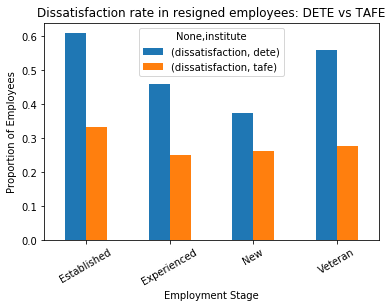

In [330]:
combined_updated.pivot_table(index=['service_cat','institute'], values='dissatisfaction').unstack().plot(kind='bar', rot=30)
plt.title('Dissatisfaction rate in resigned employees: DETE vs TAFE')
plt.xlabel('Employment Stage')
plt.ylabel('Proportion of Employees')

-------------------------------------------------------------------------------------------------------------------------
### Employee age groups and rate of dissatisfaction
Employees will be grouped into the following age groups:
* 20 or under
* 21 - 25
* 26 - 30
* 31 - 35
* 36 - 40
* 41 - 45
* 46 - 50
* 51 - 55
* 56 or over

In [331]:
combined_updated['age'] = combined_updated['age'].str.replace('\s–\s','-').str.replace('56 or older','56-60').str.replace('older','over').\
str.replace('younger','under')

C:\Users\Liao\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [332]:
combined_updated['age'].value_counts()

41-45          93
46-50          81
36-40          73
51-55          71
26-30          67
21-25          62
31-35          61
56-60          55
61 or over     23
20 or under    10
Name: age, dtype: int64

Text(0.5, 0, 'Employee Age Group')

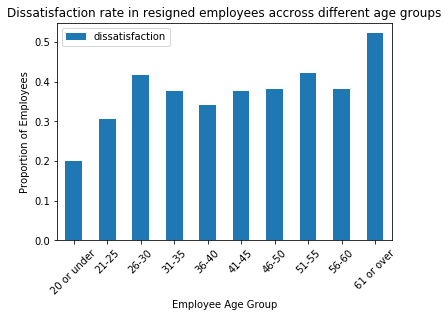

In [333]:
combined_updated.pivot_table(index='age', values='dissatisfaction').plot(kind='bar', rot=45)
plt.title('Dissatisfaction rate in resigned employees accross different age groups')
plt.ylabel('Proportion of Employees')
plt.xlabel('Employee Age Group')

### Conclusion
* DETE Employees with 7 or more years of service are more likely to resign due to dissatisfaction, compare to New employees. 
* We observed similar trends in TAFE group, however the differences is rather small compare to DETE employees.
* Younger employees (under 25 years old) are less likely to resign due to dissatisfaction at work in comparison to older employees. Employees in the oldest age group '61 and over' are most likely to resign due to dissatisfaction at work.